In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import time
from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colorbar, colors
from matplotlib import ticker
from matplotlib import cm
import matplotlib as mpl
from matplotlib import rc
import matplotlib.style
import pandas as pd
import cmocean  # cmocean.cm.ice
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython
import itertools
from scipy.interpolate import interp1d
from scipy.io import loadmat
import matplotlib.patches as patches
horse = IPython.display.Audio(url="http://www.w3schools.com/html/horse.ogg",autoplay=True)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
import spectrum
from spectrum import tools
fig_dir = '/Users/jiachenlu/Thesis/Figures/'
s_int = 600
# New colors in JPL's paper
lcolor = [
    [0.9373,    0.2667,    0.1412],
    [0.9490,    0.4353,    0.1333],
    [1.0000,    0.8549,    0.0510],
    [0.6078,    0.7922,    0.2353],
    [0.1529,    0.7020,    0.2902],
    [     0,    0.6667,    0.3765],
    [0.0039,    0.7176,    0.6863],
    [0.0353,    0.5216,    0.7765],
    [0.2392,    0.1882,    0.5725],
    [0.3137,    0.1804,    0.5647],
    [0.5333,    0.2431,    0.5843],
    [0.8431,    0.3137,    0.6118],
    [0.9294,    0.2000,    0.3843],
    ]
cmap_JPL = mpl.colors.ListedColormap(lcolor)

In [2]:
expnr = '003'
cfrac = Dataset('profiles.' + expnr + '.nc').variables['cfrac'][:]
thv = Dataset('profiles.' + expnr + '.nc').variables['thv'][:]
z = Dataset('profiles.' + expnr + '.nc').variables['zt'][:]
w2 = Dataset('profiles.' + expnr + '.nc').variables['w2r'][:]
skew = Dataset('profiles.' + expnr + '.nc').variables['skew'][:]
qtt = Dataset('profiles.' + expnr + '.nc').variables['qt'][:]
thlt = Dataset('profiles.' + expnr + '.nc').variables['thl'][:]

tcfrac = Dataset('tmser.' + expnr + '.nc').variables['cfrac'][:]
we = Dataset('tmser.' + expnr + '.nc').variables['we'][:]
zcb = Dataset('tmser.' + expnr + '.nc').variables['zb'][:]
zct = Dataset('tmser.' + expnr + '.nc').variables['zc_av'][:]
zi = Dataset('tmser.' + expnr + '.nc').variables['zi'][:]
LWP = Dataset('tmser.' + expnr + '.nc').variables['lwp_bar'][:]
LWPM = Dataset('tmser.' + expnr + '.nc').variables['lwp_max'][:]
tke = Dataset('tmser.' + expnr + '.nc').variables['vtke'][:]
lhf = Dataset('tmser.' + expnr + '.nc').variables['wq'][:]
shf = Dataset('tmser.' + expnr + '.nc').variables['wtheta'][:]


In [3]:
t = np.linspace(0,40,len(zi))
tt,zz = np.meshgrid(z,t)

In [ ]:
np.shape(skew) ## New input profile save the result every 60s instead of 600s so all the t_index should multiply by 
#10

In [ ]:
plt.plot(thv)

In [30]:
np.shape(zi)


(2400,)

In [3]:
# Calculate the different height defined in Aj's thesis
tt_index = 240
stt = np.zeros(tt_index,dtype=int) + np.nan
stb = np.zeros(tt_index,dtype=int) + np.nan
hstt = np.zeros(tt_index) + np.nan
hstb = np.zeros(tt_index) + np.nan
ct = np.zeros(tt_index,dtype=int) + np.nan
cb = np.zeros(tt_index,dtype=int) + np.nan
hct = np.zeros(tt_index) + np.nan
hcb = np.zeros(tt_index) + np.nan
hcut = np.zeros(tt_index,dtype=int) + np.nan
hcub = np.zeros(tt_index,dtype=int) + np.nan
subcld = np.zeros(tt_index) + np.nan
hsubcld = np.zeros(tt_index) + np.nan

for t_index in range(tt_index-1):
    if np.max(cfrac[t_index,:]) > 0:
        ct[t_index] = [cc for cc, e in enumerate(cfrac[t_index,:]) if e > 0][-1]
        cb[t_index] = [cc for cc, e in enumerate(cfrac[t_index,:]) if e > 0][0]
        hct[t_index] = z[int(ct[t_index])]
        hcb[t_index] = z[int(cb[t_index])]
    if np.max(cfrac[t_index,:]) > 0.4:
        stt[t_index] = [cc for cc, e in enumerate(cfrac[t_index,:]) if e > 0.4][-1]
        stb[t_index] = [cc for cc, e in enumerate(cfrac[t_index,:]) if e > 0.4][0]
        hstt[t_index] = z[int(stt[t_index])]
        hstb[t_index] = z[int(stb[t_index])]
        
for t_index in range(tt_index-1):
    if np.max(cfrac[t_index,:]) > 0:
        subcld[t_index] = [cc for cc, e in enumerate(np.diff(cfrac[t_index,:])) if e < 0][0]
        hsubcld[t_index] = z[int(subcld[t_index])]


In [27]:
[cc for cc, e in enumerate(cfrac[t_index,:]) if e > 0

IndexError: index 240 is out of bounds for axis 0 with size 240

In [ ]:
[cc for cc, e in enumerate(cfrac[t_index,:]) if e > 0][-1]

In [ ]:
np.shape(zi)

In [4]:
# Load the observation data from EUCLIPSE
x = loadmat('flight01.mat')
flight01  = x['aa']
x = loadmat('flight02.mat')
flight02  = x['aa']
x = loadmat('flight03.mat')
flight03  = x['aa']
x = loadmat('flight04.mat')
flight04  = x['aa']
x = loadmat('flight05.mat')
flight05  = x['aa']

x = loadmat('flight01_tur.mat')
flight01_tur  = x['aa']
x = loadmat('flight02_tur.mat')
flight02_tur  = x['aa']
x = loadmat('flight03_tur.mat')
flight03_tur  = x['aa']
x = loadmat('flight04_tur.mat')
flight04_tur  = x['aa']
x = loadmat('flight05_tur.mat')
flight05_tur  = x['aa']
# Use height sequence for the new list
# z[m]/ql[g/kg]/T[K]/qv[g/kg]/qt[g/kg]/p[mbar]/
#Teta[K]/Tetav[K]/Tetae[K]/Tetal[K]/u[m/s]/v[m/s]/ccover
flight01 = sorted(flight01,key=lambda x: x[0]) # Hour 
flight02 = sorted(flight02,key=lambda x: x[0]) # Initialization
flight03 = sorted(flight03,key=lambda x: x[0]) # Hour 8 48 
flight04 = sorted(flight04,key=lambda x: x[0]) # Hour 19 114
flight05 = sorted(flight05,key=lambda x: x[0]) # Hour 36 216
# z[m]u^2[m2/s2]v^2[m2/s2]w^2[m2/s2]e[m2/s2]www[m3/s3] Skewness    
# wql[*]wqv[*]wqt[*]wTeta[mK/s]wTetav[mK/s]
flight01_tur = sorted(flight01_tur,key=lambda x: x[0]) # Hour 
flight02_tur = sorted(flight02_tur,key=lambda x: x[0]) # Initialization
flight03_tur = sorted(flight03_tur,key=lambda x: x[0]) # Hour 8 48 
flight04_tur = sorted(flight04_tur,key=lambda x: x[0]) # Hour 19 114
flight05_tur = sorted(flight05_tur,key=lambda x: x[0]) # Hour 36 216



In [7]:
# Do some interpolation and extrapolation to find additional values from observation data
ob_frac1 = np.zeros(np.shape(flight01)[0])
ob_z1 = np.zeros(np.shape(flight01)[0])
ob_qt1 = np.zeros(np.shape(flight01)[0])
ob_thl1 = np.zeros(np.shape(flight01)[0])
ob_ql1 = np.zeros(np.shape(flight01)[0])

obt_w21 =  np.zeros(np.shape(flight01_tur)[0])
obt_z1 =  np.zeros(np.shape(flight01_tur)[0])
obt_skw1 =  np.zeros(np.shape(flight01_tur)[0])

ob_frac2 = np.zeros(np.shape(flight02)[0])
ob_z2 = np.zeros(np.shape(flight02)[0])
ob_qt2 = np.zeros(np.shape(flight02)[0])
ob_thl2 = np.zeros(np.shape(flight02)[0])
ob_ql2 = np.zeros(np.shape(flight02)[0])

obt_w22 =  np.zeros(np.shape(flight02_tur)[0])
obt_z2 =  np.zeros(np.shape(flight02_tur)[0])
obt_skw2 =  np.zeros(np.shape(flight02_tur)[0])

ob_frac3 = np.zeros(np.shape(flight03)[0])
ob_z3 = np.zeros(np.shape(flight03)[0])
ob_qt3 = np.zeros(np.shape(flight03)[0])
ob_thl3 = np.zeros(np.shape(flight03)[0])
ob_ql3 = np.zeros(np.shape(flight03)[0])

obt_w23 =  np.zeros(np.shape(flight03_tur)[0])
obt_z3 =  np.zeros(np.shape(flight03_tur)[0])
obt_skw3 =  np.zeros(np.shape(flight03_tur)[0])

ob_frac4 = np.zeros(np.shape(flight04)[0])
ob_z4 = np.zeros(np.shape(flight04)[0])
ob_qt4 = np.zeros(np.shape(flight04)[0])
ob_thl4 = np.zeros(np.shape(flight04)[0])
ob_ql4 = np.zeros(np.shape(flight04)[0])

obt_w24 =  np.zeros(np.shape(flight04_tur)[0])
obt_z4 =  np.zeros(np.shape(flight04_tur)[0])
obt_skw4 =  np.zeros(np.shape(flight04_tur)[0])

ob_frac5 = np.zeros(np.shape(flight05)[0])
ob_z5 = np.zeros(np.shape(flight05)[0])
ob_qt5 = np.zeros(np.shape(flight05)[0])
ob_thl5 = np.zeros(np.shape(flight05)[0])
ob_ql5 = np.zeros(np.shape(flight05)[0])

obt_w25 =  np.zeros(np.shape(flight05_tur)[0])
obt_z5 =  np.zeros(np.shape(flight05_tur)[0])
obt_skw5 =  np.zeros(np.shape(flight05_tur)[0])
# Collect data from *.mat for profile
for i in range(np.shape(flight01)[0]): # Loop over the whole height
    ob_z1[i] = flight01[i][0] 
    ob_frac1[i] = flight01[i][-1]
    ob_qt1[i] = flight01[i][4]
    ob_thl1[i] = flight01[i][9]
    ob_ql1[i] = flight01[i][1]
for i in range(np.shape(flight02)[0]):    
    ob_z2[i] = flight02[i][0] 
    ob_frac2[i] = flight02[i][-1]
    ob_qt2[i] = flight02[i][4]
    ob_thl2[i] = flight02[i][9]

for i in range(np.shape(flight03)[0]):    
    ob_z3[i] = flight03[i][0] 
    ob_frac3[i] = flight03[i][-1] 
    ob_qt3[i] = flight03[i][4]
    ob_thl3[i] = flight03[i][9]
for i in range(np.shape(flight04)[0]):    
    ob_z4[i] = flight04[i][0] 
    ob_frac4[i] = flight04[i][-1] 
    ob_qt4[i] = flight04[i][4]
    ob_thl4[i] = flight04[i][9]
for i in range(np.shape(flight05)[0]):    
    ob_z5[i] = flight05[i][0] 
    ob_frac5[i] = flight05[i][-1] 
    ob_qt5[i] = flight05[i][4]
    ob_thl5[i] = flight05[i][9]
# Collect data from *.mat for turbulence profile
for i in range(np.shape(flight01_tur)[0]): # Loop over the whole height
    obt_z1[i] = flight01_tur[i][0]
    obt_w21[i] = flight01_tur[i][3]
    obt_skw1[i] = flight01_tur[i][6]
for i in range(np.shape(flight02_tur)[0]): # Loop over the whole height
    obt_z2[i] = flight02_tur[i][0]
    obt_w22[i] = flight02_tur[i][3]
    obt_skw2[i] = flight02_tur[i][6]
for i in range(np.shape(flight03_tur)[0]): # Loop over the whole height
    obt_z3[i] = flight03_tur[i][0]
    obt_w23[i] = flight03_tur[i][3]
    obt_skw3[i] = flight03_tur[i][6]
for i in range(np.shape(flight04_tur)[0]): # Loop over the whole height
    obt_z4[i] = flight04_tur[i][0]
    obt_w24[i] = flight04_tur[i][3]
    obt_skw4[i] = flight04_tur[i][6]
for i in range(np.shape(flight05_tur)[0]): # Loop over the whole height
    obt_z5[i] = flight05_tur[i][0]
    obt_w25[i] = flight05_tur[i][3]
    obt_skw5[i] = flight05_tur[i][6]

In [ ]:
i

In [5]:
# Read GCSS/EUCLIPSE intercomparison data
qt_SAM = Dataset('profiles_blo.nc').variables['qt'][:]
thl_SAM = Dataset('profiles_blo.nc').variables['thetal'][:]
z_SAM = Dataset('profiles_blo.nc').variables['zf'][:] 
zi_SAM = Dataset('scalars_blo.nc').variables['zi'][:]
LWP_SAM = Dataset('scalars_blo.nc').variables['LWP'][:]
zb_SAM = Dataset('scalars_blo.nc').variables['zcb'][:]
zct_SAM = Dataset('scalars_blo.nc').variables['zctmn'][:]
we_SAM = Dataset('scalars_blo.nc').variables['we'][:]
tke_SAM = Dataset('scalars_blo.nc').variables['tke'][:]
cfrac_SAM = Dataset('scalars_blo.nc').variables['cc'][:]
lhf_SAM = Dataset('scalars_blo.nc').variables['lhf'][:]
shf_SAM = Dataset('scalars_blo.nc').variables['shf'][:]
w_var_SAM = Dataset('profiles_blo.nc').variables['w_var'][:] 
w_skw_SAM = Dataset('profiles_blo.nc').variables['w_skw'][:] 
frac_SAM = Dataset('profiles_blo.nc').variables['cfrac'][:]

qt_DALES = Dataset('profiles_van.nc').variables['qt'][:]
thl_DALES = Dataset('profiles_van.nc').variables['thetal'][:]
z_DALES = Dataset('profiles_van.nc').variables['zf'][:] 
zi_DALES = Dataset('scalars_van.nc').variables['zi'][:]
LWP_DALES = Dataset('scalars_van.nc').variables['LWP'][:]
zb_DALES = Dataset('scalars_van.nc').variables['zcb'][:]
zct_DALES = Dataset('scalars_van.nc').variables['zctmn'][:]
we_DALES = Dataset('scalars_van.nc').variables['we'][:]
tke_DALES = Dataset('scalars_van.nc').variables['tke'][:]
lhf_DALES = Dataset('scalars_van.nc').variables['lhf'][:]
shf_DALES = Dataset('scalars_van.nc').variables['shf'][:]
w_var_DALES = Dataset('profiles_van.nc').variables['w_var'][:]
w_skw_DALES = Dataset('profiles_van.nc').variables['w_skw'][:]
cfrac_DALES = Dataset('scalars_van.nc').variables['cc'][:]
frac_DALES = Dataset('profiles_van.nc').variables['cfrac'][:]

qt_MOLEM = Dataset('profiles_loc.nc').variables['qt'][:]
thl_MOLEM = Dataset('profiles_loc.nc').variables['thetal'][:]
z_MOLEM = Dataset('profiles_loc.nc').variables['zf'][:] 
zi_MOLEM = Dataset('scalars_loc.nc').variables['zi'][:]
LWP_MOLEM = Dataset('scalars_loc.nc').variables['LWP'][:]
zb_MOLEM = Dataset('scalars_loc.nc').variables['zcb'][:]
zct_MOLEM = Dataset('scalars_loc.nc').variables['zctmn'][:]
we_MOLEM = Dataset('scalars_loc.nc').variables['we'][:]
tke_MOLEM = Dataset('scalars_loc.nc').variables['tke'][:]
lhf_MOLEM = Dataset('scalars_loc.nc').variables['lhf'][:]
shf_MOLEM = Dataset('scalars_loc.nc').variables['shf'][:]
w_var_MOLEM = Dataset('profiles_loc.nc').variables['w_var'][:] 
w_skw_MOLEM = Dataset('profiles_loc.nc').variables['w_skw'][:]
cfrac_MOLEM = Dataset('scalars_loc.nc').variables['cc'][:]
tt_MOLEM = Dataset('scalars_loc.nc').variables['time'][:]
frac_MOLEM = Dataset('profiles_loc.nc').variables['cfrac'][:]



qt_EULAG = Dataset('profiles_kur.nc').variables['qt'][:]
thl_EULAG = Dataset('profiles_kur.nc').variables['thetal'][:]
z_EULAG = Dataset('profiles_kur.nc').variables['zf'][:] 
zi_EULAG = Dataset('scalars_kur.nc').variables['zi'][:]
LWP_EULAG = Dataset('scalars_kur.nc').variables['LWP'][:]
zb_EULAG = Dataset('scalars_kur.nc').variables['zcb'][:]
zct_EULAG = Dataset('scalars_kur.nc').variables['zctmn'][:]
we_EULAG = Dataset('scalars_kur.nc').variables['we'][:]
tke_EULAG = Dataset('scalars_kur.nc').variables['tke'][:]
lhf_EULAG = Dataset('scalars_kur.nc').variables['lhf'][:]
shf_EULAG = Dataset('scalars_kur.nc').variables['shf'][:]
w_var_EULAG = Dataset('profiles_kur.nc').variables['w_var'][:] 
w_skw_EULAG = Dataset('profiles_kur.nc').variables['w_skw'][:] 
cfrac_EULAG = Dataset('scalars_kur.nc').variables['cc'][:]
frac_EULAG = Dataset('profiles_kur.nc').variables['cfrac'][:]

qt_UCLALES = Dataset('profiles_san.nc').variables['qt'][:]
thl_UCLALES = Dataset('profiles_san.nc').variables['thetal'][:]
z_UCLALES = Dataset('profiles_san.nc').variables['zf'][:]
zi_UCLALES = Dataset('scalars_san.nc').variables['zi'][:]
LWP_UCLALES = Dataset('scalars_san.nc').variables['LWP'][:]
zb_UCLALES = Dataset('scalars_san.nc').variables['zcb'][:]
zct_UCLALES = Dataset('scalars_san.nc').variables['zctmn'][:]
#we_UCLALES = Dataset('scalars_san.nc').variables['we'][:]
tke_UCLALES = Dataset('scalars_san.nc').variables['tke'][:]
lhf_UCLALES = Dataset('scalars_san.nc').variables['lhf'][:]
shf_UCLALES = Dataset('scalars_san.nc').variables['shf'][:]
w_var_UCLALES = Dataset('profiles_san.nc').variables['w_var'][:] 
w_skw_UCLALES = Dataset('profiles_san.nc').variables['w_skw'][:]
cfrac_UCLALES = Dataset('scalars_san.nc').variables['cc'][:]
frac_UCLALES = Dataset('profiles_san.nc').variables['cfrac'][:]

qt_DHARMA = Dataset('profiles_ack.nc').variables['qt'][:]
thl_DHARMA = Dataset('profiles_ack.nc').variables['thetal'][:]
z_DHARMA = Dataset('profiles_ack.nc').variables['zf'][:] 
zi_DHARMA = Dataset('scalars_ack.nc').variables['zi'][:]
LWP_DHARMA = Dataset('scalars_ack.nc').variables['LWP'][:]
zb_DHARMA = Dataset('scalars_ack.nc').variables['zcb'][:]
zct_DHARMA = Dataset('scalars_ack.nc').variables['zct'][:]
we_DHARMA = Dataset('scalars_ack.nc').variables['we'][:]
tke_DHARMA = Dataset('scalars_ack.nc').variables['tke'][:]
lhf_DHARMA = Dataset('scalars_ack.nc').variables['lhf'][:]
shf_DHARMA = Dataset('scalars_ack.nc').variables['shf'][:]
w_var_DHARMA = Dataset('profiles_ack.nc').variables['w_var'][:] 
w_skw_DHARMA = Dataset('profiles_ack.nc').variables['w_skw'][:]
cfrac_DHARMA = Dataset('scalars_ack.nc').variables['cc'][:]
frac_DHARMA = Dataset('profiles_ack.nc').variables['cfrac'][:]

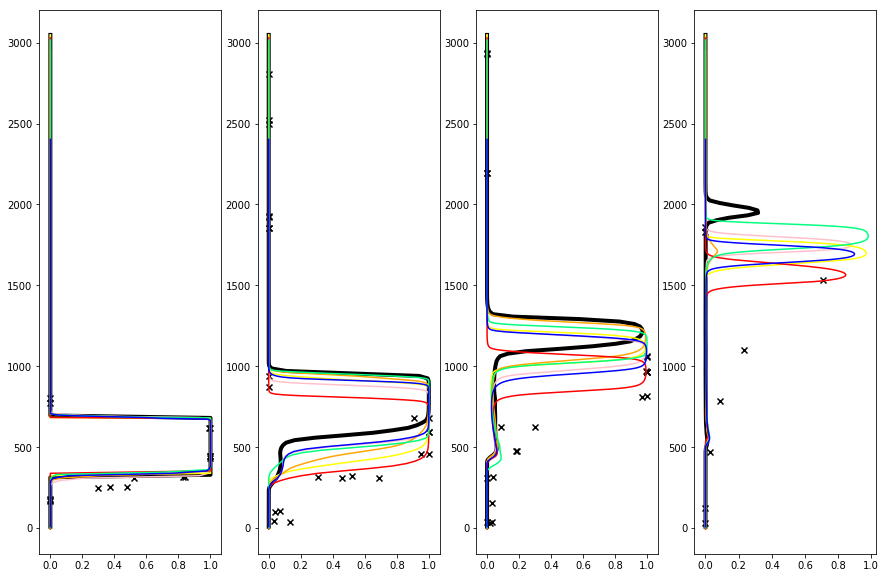

In [36]:
colors = itertools.cycle(["pink","yellow","orange","red","springgreen","blue"])
plt.subplots(1,4,figsize = (15,10))
ax = plt.subplot(141)
plt.scatter(ob_frac2,ob_z2,marker='x',color = 'black')
plt.plot(cfrac[0,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(frac_DALES[0,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(frac_UCLALES[0,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(frac_DHARMA[0,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(frac_MOLEM[0,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(frac_EULAG[0,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(frac_SAM[0,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax = plt.subplot(142)
plt.scatter(ob_frac3,ob_z3,marker='x',color = 'black')
plt.plot(cfrac[48,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(frac_DALES[8,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(frac_UCLALES[8,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(frac_DHARMA[8,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(frac_MOLEM[8,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(frac_EULAG[8,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(frac_SAM[8,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')

ax = plt.subplot(143)
plt.scatter(ob_frac4,ob_z4,marker='x',color = 'black')
plt.plot(cfrac[114,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(frac_DALES[19,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(frac_UCLALES[19,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(frac_DHARMA[19,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(frac_MOLEM[19,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(frac_EULAG[19,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(frac_SAM[19,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')

ax = plt.subplot(144)
plt.scatter(ob_frac5,ob_z5,marker='x',color = 'black')
plt.plot(cfrac[230,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(frac_DALES[36,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(frac_UCLALES[36,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(frac_DHARMA[36,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(frac_MOLEM[36,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(frac_EULAG[36,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(frac_SAM[36,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')


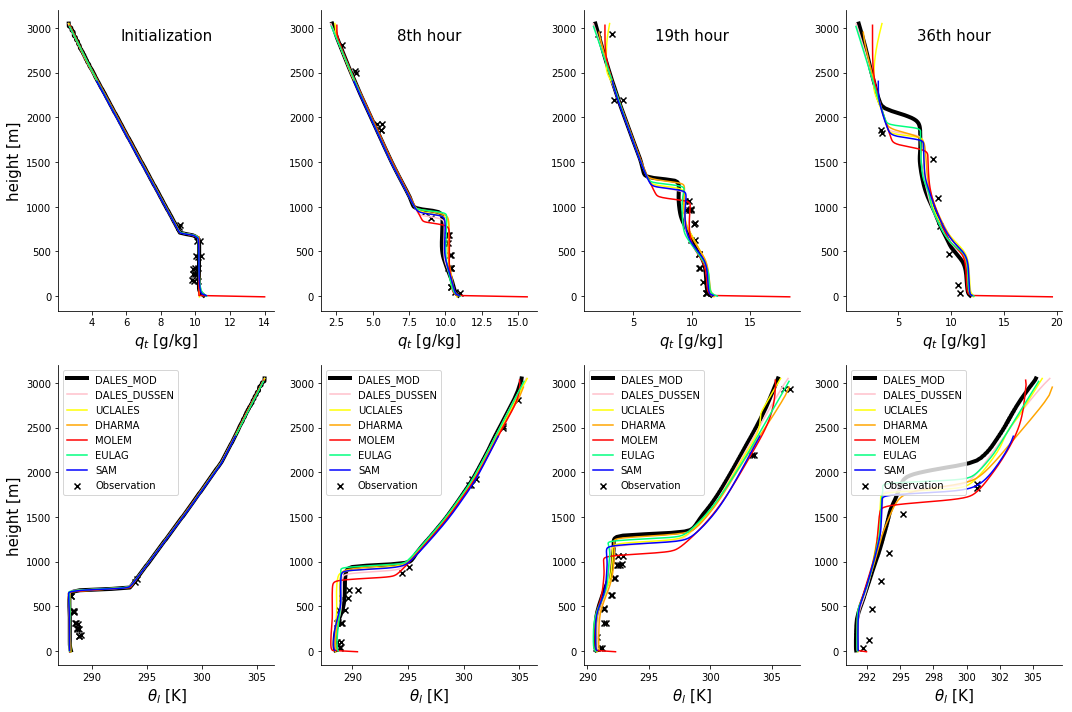

In [8]:
colors = itertools.cycle(["pink","yellow","orange","red","springgreen","blue"])
plt.subplots(2,4,figsize = (15,10))
ax = plt.subplot(241)
plt.scatter(ob_qt2,ob_z2,marker='x',color = 'black',label = 'Observation')
plt.ylabel('height [m]',fontsize = 15)
plt.xlabel('$q_t$ [g/kg]',fontsize = 15)
plt.plot(qtt[0*s_int,:]*1e3,z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(qt_DALES[0,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(qt_UCLALES[0,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(qt_DHARMA[0,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(qt_MOLEM[0,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(qt_EULAG[0,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(qt_SAM[0,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(.5,.9,'Initialization',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)


ax = plt.subplot(242)
time_temp = int(8*3600/s_int)
plt.scatter(ob_qt3,ob_z3,marker='x',color = 'black',label = 'Observation')
plt.xlabel('$q_t$ [g/kg]',fontsize = 15)
plt.plot(qtt[time_temp,:]*1e3,z,color='black',linewidth = 4,label = 'DALES_MOD') # 8th Hour
plt.plot(qt_DALES[8,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(qt_UCLALES[8,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(qt_DHARMA[8,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(qt_MOLEM[8,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(qt_EULAG[8,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(qt_SAM[8,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'8th hour',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(243)
time_temp = int(19*3600/s_int)
plt.scatter(ob_qt4,ob_z4,marker='x',color = 'black',label = 'Observation')
plt.xlabel('$q_t$ [g/kg]',fontsize = 15)
plt.plot(qtt[time_temp,:]*1e3,z,color='black',linewidth = 4,label = 'DALES_MOD') # 19th Hour
plt.plot(qt_DALES[19,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(qt_UCLALES[19,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(qt_DHARMA[19,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(qt_MOLEM[19,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(qt_EULAG[19,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(qt_SAM[19,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'19th hour',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = plt.subplot(244)
time_temp = int(36*3600/s_int)
plt.scatter(ob_qt5,ob_z5,marker='x',color = 'black',label = 'Observation')
plt.xlabel('$q_t$ [g/kg]',fontsize = 15)
plt.plot(qtt[time_temp,:]*1e3,z,color='black',linewidth = 4,label = 'DALES_MOD') # 36th Hour
plt.plot(qt_DALES[36,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(qt_UCLALES[36,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(qt_DHARMA[36,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(qt_MOLEM[36,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(qt_EULAG[36,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(qt_SAM[36,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'36th hour',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(245)
time_temp = int(0*3600/s_int)
plt.scatter(ob_thl2,ob_z2,marker='x',color = 'black',label = 'Observation')
plt.plot(thlt[time_temp,:],z,color = 'black',linewidth = 4,label = 'DALES_MOD') # 0th Hour
plt.plot(thl_DALES[0,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(thl_UCLALES[0,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(thl_DHARMA[0,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(thl_MOLEM[0,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(thl_EULAG[0,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(thl_SAM[0,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
plt.xlabel('$\\theta_l$ [K]',fontsize = 15)
plt.ylabel('height [m]',fontsize = 15)
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(246)
time_temp = int(8*3600/s_int)
plt.scatter(ob_thl3,ob_z3,marker='x',color = 'black',label = 'Observation')
plt.plot(thlt[time_temp,:],z,color = 'black',linewidth = 4,label = 'DALES_MOD') # 8th Hour
plt.plot(thl_DALES[8,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(thl_UCLALES[8,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(thl_DHARMA[8,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(thl_MOLEM[8,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(thl_EULAG[8,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(thl_SAM[8,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
plt.xlabel('$\\theta_l$ [K]',fontsize = 15)
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(247)
time_temp = int(19*3600/s_int)
plt.scatter(ob_thl4,ob_z4,marker='x',color = 'black',label = 'Observation')
plt.plot(thlt[time_temp,:],z,color = 'black',linewidth = 4,label = 'DALES_MOD') # 19th Hour
plt.plot(thl_DALES[19,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(thl_UCLALES[19,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(thl_DHARMA[19,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(thl_MOLEM[19,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(thl_EULAG[19,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(thl_SAM[19,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
plt.xlabel('$\\theta_l$ [K]',fontsize = 15)
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(248)
time_temp = int(36*3600/s_int)
plt.scatter(ob_thl5,ob_z5,marker='x',color = 'black',label = 'Observation')
plt.plot(thlt[time_temp,:],z,color = 'black',linewidth = 4,label = 'DALES_MOD') # 36th Hour
plt.plot(thl_DALES[36,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(thl_UCLALES[36,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(thl_DHARMA[36,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(thl_MOLEM[36,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(thl_EULAG[36,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(thl_SAM[36,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
plt.xlabel('$\\theta_l$ [K]',fontsize = 15)
formatter = matplotlib.ticker.FormatStrFormatter('%3.0f')
ax.xaxis.set_major_formatter(formatter)
lgnd = ax.legend(loc='upper left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir + 'obsev_qthl.eps')

In [ ]:
pwd

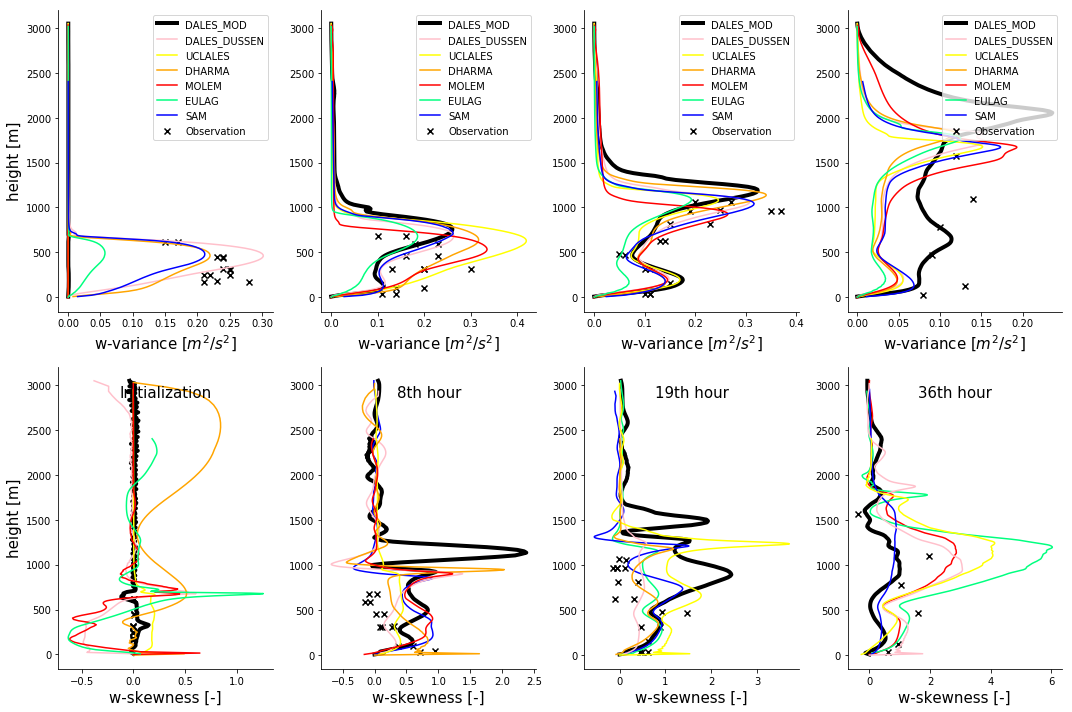

In [56]:
# Test for 8/19/36 with observation and results from EUCLIPSE
# Vertical velocity variance as a indicator for the decoupling


colors = itertools.cycle(["pink","yellow","orange","red","springgreen","blue"])
plt.subplots(2,4,figsize = (15,10))
ax = plt.subplot(241)
time_temp = int(0*3600/s_int)
plt.ylabel('height [m]',fontsize = 15)

plt.xlabel('w-variance $[m^2/s^2]$',fontsize = 15)
plt.scatter(obt_w22,obt_z2,marker='x',color = 'black',label = 'Observation')
plt.plot(w2[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(w_var_DALES[0,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_var_UCLALES[0,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_var_DHARMA[0,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(w_var_MOLEM[0,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_var_EULAG[0,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_var_SAM[0,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
ax = plt.subplot(242)
time_temp = int(8*3600/s_int)
plt.xlabel('w-variance $[m^2/s^2]$',fontsize = 15)
plt.scatter(obt_w23,obt_z3,marker='x',color = 'black',label = 'Observation')
plt.plot(w2[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 8th Hour
plt.plot(w_var_DALES[8,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_var_UCLALES[8,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_var_DHARMA[8,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(w_var_MOLEM[8,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_var_EULAG[8,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_var_SAM[8,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
ax = plt.subplot(243)
time_temp = int(19*3600/s_int)
plt.xlabel('w-variance $[m^2/s^2]$',fontsize = 15)
plt.scatter(obt_w24,obt_z4,marker='x',color = 'black',label = 'Observation')
plt.plot(w2[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 19th Hour
plt.plot(w_var_DALES[19,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_var_UCLALES[19,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_var_DHARMA[19,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(w_var_MOLEM[19,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_var_EULAG[19,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_var_SAM[19,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
ax = plt.subplot(244)
time_temp = int(36*3600/s_int)
plt.xlabel('w-variance $[m^2/s^2]$',fontsize = 15)
plt.scatter(obt_w25,obt_z5,marker='x',color = 'black',label = 'Observation')
plt.plot(w2[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 19th Hour
plt.plot(w_var_DALES[36,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_var_UCLALES[36,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_var_DHARMA[36,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(w_var_MOLEM[36,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_var_EULAG[36,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_var_SAM[36,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
lgnd = ax.legend(loc='upper right')


ax = plt.subplot(245)
time_temp = int(0*3600/s_int)
plt.ylabel('height [m]',fontsize = 15)
plt.xlabel('w-skewness [-]',fontsize = 15)
plt.scatter(obt_skw2,obt_z2,marker='x',color = 'black',label = 'Observation')
plt.plot(skew[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 0th Hour -- initialization
plt.plot(w_skw_DALES[0,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
#plt.plot(w_skw_UCLALES[0,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_skw_DHARMA[0,:],z_DHARMA,color=next(colors),label = 'DHARMA')
plt.plot(w_skw_MOLEM[0,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_skw_EULAG[0,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_skw_SAM[0,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'Initialization',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(246)
time_temp = int(8*3600/s_int)
plt.xlabel('w-skewness [-]',fontsize = 15)
plt.scatter(obt_skw3,obt_z3,marker='x',color = 'black',label = 'Observation')
plt.plot(skew[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 8th Hour
plt.plot(w_skw_DALES[8,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_skw_UCLALES[8,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_skw_DHARMA[8,:],z_DHARMA,color=next(colors),label = 'DHARMA')
#plt.plot(w_skw_MOLEM[8,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_skw_EULAG[8,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_skw_SAM[8,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'8th hour',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(247)
time_temp = int(19*3600/s_int)
plt.xlabel('w-skewness [-]',fontsize = 15)
plt.scatter(obt_skw4,obt_z4,marker='x',color = 'black',label = 'Observation')
plt.plot(skew[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 19th Hour
plt.plot(w_skw_DALES[19,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_skw_UCLALES[19,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_skw_DHARMA[19,:],z_DHARMA,color=next(colors),label = 'DHARMA')
#plt.plot(w_skw_MOLEM[19,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_skw_EULAG[19,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_skw_SAM[19,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'19th hour',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(248)
time_temp = int(36*3600/s_int)
plt.xlabel('w-skewness [-]',fontsize = 15)
plt.scatter(obt_skw5,obt_z5,marker='x',color = 'black',label = 'Observation')
plt.plot(skew[time_temp,:],z,color='black',linewidth = 4,label = 'DALES_MOD') # 36th Hour
plt.plot(w_skw_DALES[36,:],z_DALES,color=next(colors),label = 'DALES_DUSSEN')
plt.plot(w_skw_UCLALES[36,:],z_UCLALES,color=next(colors),label = 'UCLALES')
plt.plot(w_skw_DHARMA[36,:],z_DHARMA,color=next(colors),label = 'DHARMA')
#plt.plot(w_skw_MOLEM[36,:],z_MOLEM,color=next(colors),label = 'MOLEM')
plt.plot(w_skw_EULAG[36,:],z_EULAG,color=next(colors),label = 'EULAG')
plt.plot(w_skw_SAM[36,0:400],z_SAM[0:400],color=next(colors),label = 'SAM')
ax.text(.5,.9,'36th hour',horizontalalignment='center',transform=ax.transAxes,fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir + 'w2.eps')


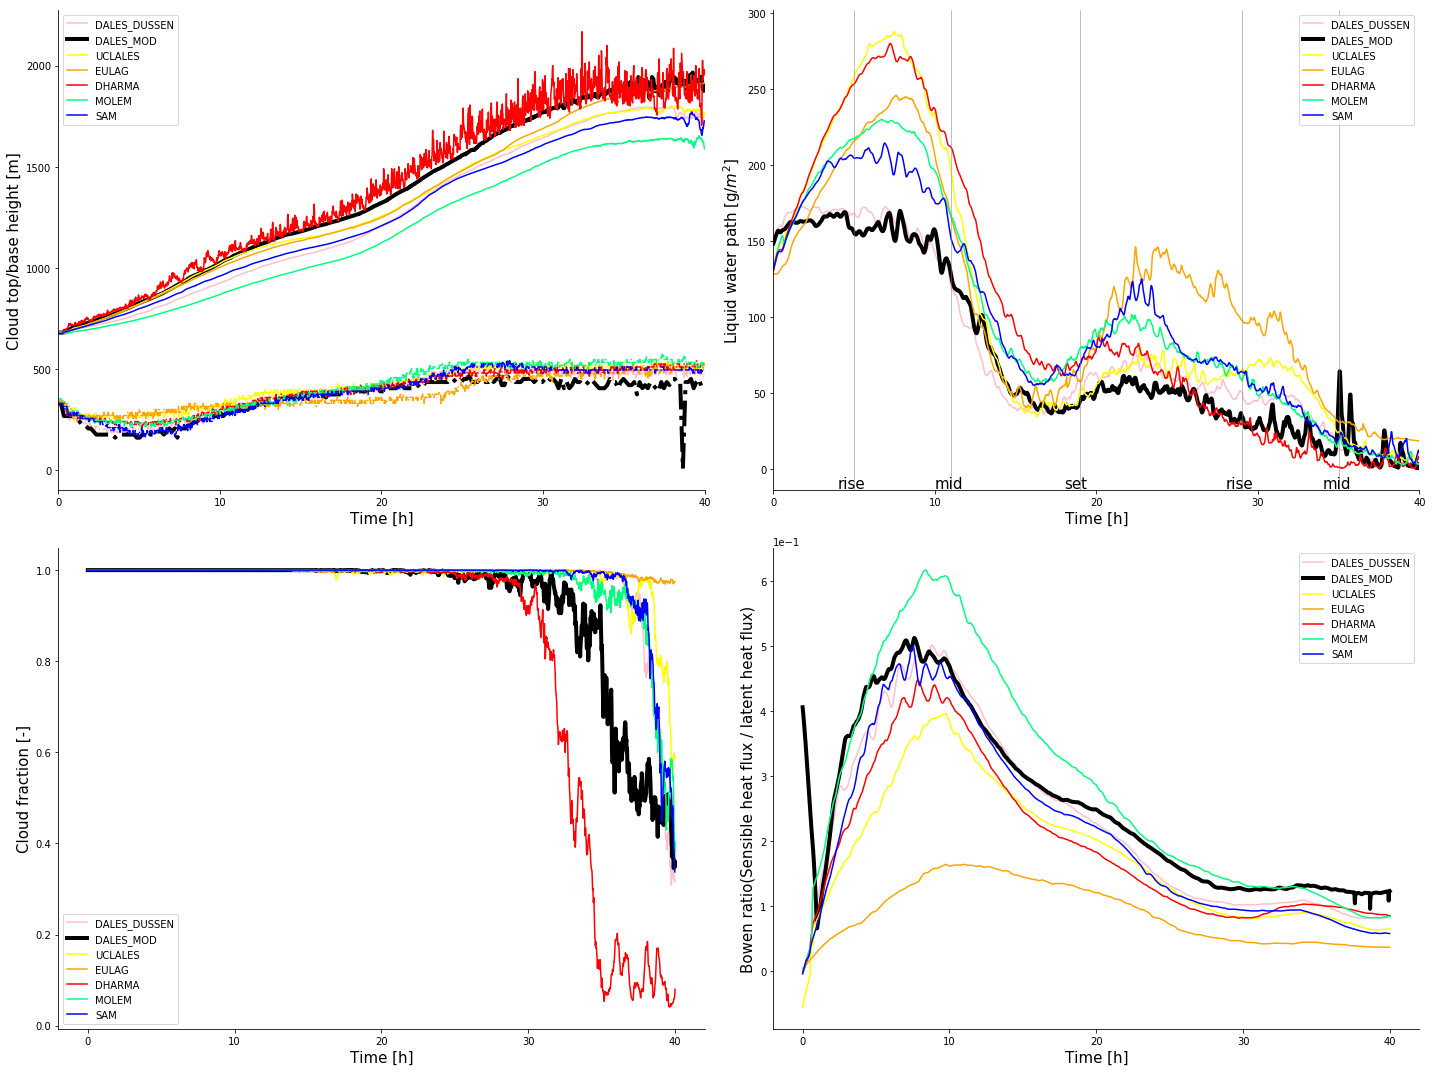

In [45]:
# Model comparison of selected variables
colors = itertools.cycle(["pink","yellow","orange","red","springgreen","blue"])
plt.subplots(2,2,figsize = (20,15))
ax = plt.subplot(221)
plt.plot(zct_DALES,label='DALES_DUSSEN',color = next(colors))
plt.plot(zct,label='DALES_MOD',color = 'black',linewidth = 4)
plt.plot(zct_UCLALES,label='UCLALES',color = next(colors))
plt.plot(zct_EULAG,label='EULAG',color = next(colors))
plt.plot(zct_DHARMA,label='DHARMA',color = next(colors))
plt.plot(tt_MOLEM/60,zct_MOLEM,label='MOLEM',color = next(colors))
plt.plot(zct_SAM,label='SAM',color = next(colors))

tt = np.linspace(0,2400,240)        
plt.plot(zb_DALES,'-.',color = next(colors))
plt.plot(tt,hcb,'-.',color = 'black',linewidth = 4)
plt.plot(zb_UCLALES,'-.',color = next(colors))
plt.plot(zb_EULAG,'-.',color = next(colors))
plt.plot(zb_DHARMA,'-.',color = next(colors))
plt.plot(tt_MOLEM/60,zb_MOLEM,'-.',color = next(colors))
plt.plot(zb_SAM,'-.',color = next(colors))
plt.xticks([0,600,1200,1800,2400], ('0', '10', '20', '30', '40'))
plt.xlabel('Time [h]',fontsize = 15)
plt.ylabel('Cloud top/base height [m]',fontsize = 15)
plt.xlim([0,2400])
plt.legend()



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(222)
plt.plot(LWP_DALES,label = 'DALES_DUSSEN',color = next(colors))
plt.plot(LWP * 1e3,label = 'DALES_MOD',color='black',linewidth = 4)
plt.plot(LWP_UCLALES,label = 'UCLALES',color = next(colors))
plt.plot(LWP_EULAG,label = 'EULAG',color = next(colors))
plt.plot(LWP_DHARMA,label='DHARMA',color = next(colors))
plt.plot(tt_MOLEM/60,LWP_MOLEM,label = 'MOLEM',color = next(colors))
plt.plot(LWP_SAM,label = 'SAM',color = next(colors))
plt.xticks([0,600,1200,1800,2400], ('0', '10', '20', '30', '40'))
plt.xlabel('Time [h]',fontsize = 15)
plt.xlim([0,2400])
plt.legend()
plt.axvline(x=5*60, color='grey',linewidth = 0.5)
plt.text(4*60,-12,'rise',rotation=0,fontsize=15)
plt.axvline(x=11*60, color='grey',linewidth = 0.5)
plt.text(10*60,-12,'mid',rotation=0,fontsize=15)
plt.axvline(x=19*60, color='grey',linewidth = 0.5)
plt.text(18*60,-12,'set',rotation=0,fontsize=15)
plt.axvline(x=29*60, color='grey',linewidth = 0.5)
plt.text(28*60,-12,'rise',rotation=0,fontsize=15)
plt.axvline(x=35*60, color='grey',linewidth = 0.5)
plt.text(34*60,-12,'mid',rotation=0,fontsize=15)
plt.ylabel('Liquid water path [g/$m^2$]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(223)
plt.plot(cfrac_DALES,color = next(colors),label = 'DALES_DUSSEN')
plt.plot(tcfrac, color = 'black',label = 'DALES_MOD',linewidth = 4)
plt.plot(cfrac_UCLALES,color = next(colors), label = 'UCLALES')
plt.plot(cfrac_EULAG,color = next(colors), label = 'EULAG')
plt.plot(cfrac_DHARMA,color = next(colors), label = 'DHARMA')
plt.plot(tt_MOLEM/60,cfrac_MOLEM,color = next(colors), label = 'MOLEM')
plt.plot(cfrac_SAM,color = next(colors), label = 'SAM')
plt.ylabel('Cloud fraction [-]',fontsize = 15)
plt.xticks([0,600,1200,1800,2400], ('0', '10', '20', '30', '40'))
plt.xlabel('Time [h]',fontsize = 15)
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(224)# Do the bowen ratio

plt.plot(shf_DALES/lhf_DALES*1e-3,label = 'DALES_DUSSEN',color = next(colors))
plt.plot(shf/lhf*1e-3,color='black',label = 'DALES_MOD',linewidth = 4)
plt.plot(shf_UCLALES/lhf_UCLALES*1e-3,label = 'UCLALES',color = next(colors))
plt.plot(shf_EULAG/lhf_EULAG,label = 'EULAG',color = next(colors))
plt.plot(shf_DHARMA/lhf_DHARMA*1e-3,label = 'DHARMA',color = next(colors))
plt.plot(tt_MOLEM/60,shf_MOLEM/lhf_MOLEM*1e-3,label = 'MOLEM',color = next(colors))
plt.plot(shf_SAM/lhf_SAM*1e-3,label = 'SAM',color = next(colors))
plt.ylabel('Bowen ratio(Sensible heat flux / latent heat flux)',fontsize = 15)
plt.xticks([0,600,1200,1800,2400], ('0', '10', '20', '30', '40'))
plt.xlabel('Time [h]',fontsize = 15)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.tight_layout()
plt.savefig(fig_dir + 'tim_evo_vali.eps')

In [ ]:
plt.plot(shf_EULAG/lhf_EULAG)

In [ ]:
np.shape(LWP)

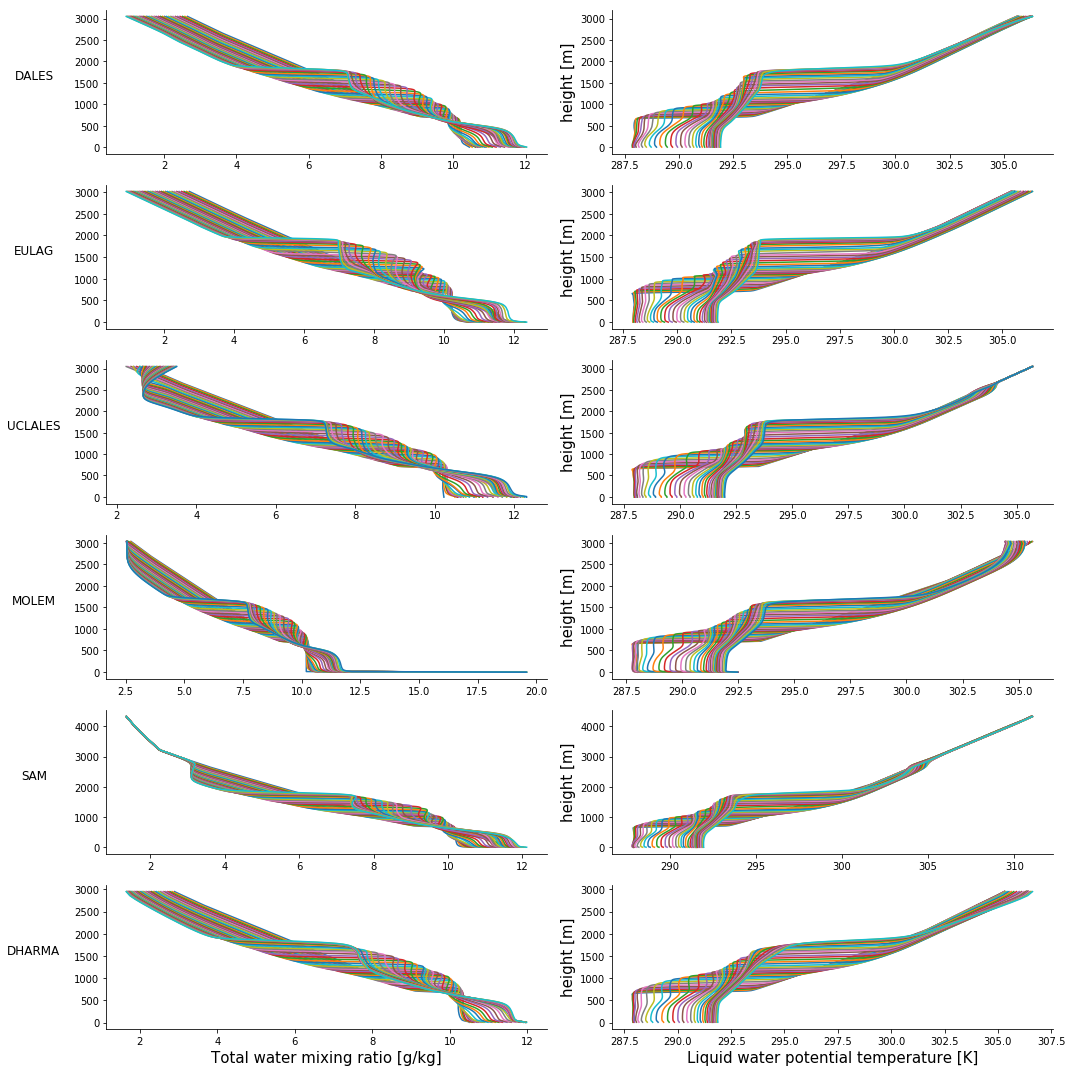

In [21]:

fig, axes = plt.subplots(6,2,figsize = (15,15),sharex='col', sharey='row')
ax = plt.subplot(629)
for i in range(np.shape(qt_SAM)[0]):
    plt.plot(qt_SAM[i,:],z_SAM)
plt.ylabel('SAM', rotation=0, size='large',labelpad=40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(6,2,10)
for i in range(np.shape(thl_SAM)[0]):
    plt.plot(thl_SAM[i,:],z_SAM)


plt.ylabel('height [m]',fontsize = 15) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(623)
for i in range(np.shape(qt_EULAG)[0]):
    plt.plot(qt_EULAG[i,:],z_EULAG)
plt.ylabel('EULAG', rotation=0, size='large',labelpad=40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(624)
for i in range(np.shape(thl_EULAG)[0]):
    plt.plot(thl_EULAG[i,:],z_EULAG)
plt.ylabel('height [m]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(625)
for i in range(np.shape(qt_UCLALES)[0]):
    plt.plot(qt_UCLALES[i,:],z_UCLALES)
plt.ylabel('UCLALES', rotation=0, size='large',labelpad=40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(626)
for i in range(np.shape(thl_UCLALES)[0]):
    plt.plot(thl_UCLALES[i,:],z_UCLALES)
plt.ylabel('height [m]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(627)
for i in range(np.shape(qt_MOLEM)[0]):
    plt.plot(qt_MOLEM[i,:],z_MOLEM)
plt.ylabel('MOLEM', rotation=0, size='large',labelpad=40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(628)
for i in range(np.shape(thl_MOLEM)[0]):
    plt.plot(thl_MOLEM[i,:],z_MOLEM)
plt.ylabel('height [m]',fontsize = 15)    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(621)
for i in range(np.shape(qt_DALES)[0]):
    plt.plot(qt_DALES[i,:],z_DALES)
plt.ylabel('DALES', rotation=0, size='large',labelpad=40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(622)
for i in range(np.shape(thl_SAM)[0]):
    plt.plot(thl_DALES[i,:],z_DALES)
plt.ylabel('height [m]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax = plt.subplot(6,2,11)
for i in range(np.shape(qt_DALES)[0]):
    plt.plot(qt_DHARMA[i,:],z_DHARMA)
plt.ylabel('DHARMA', rotation=0, size='large',labelpad=40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Total water mixing ratio [g/kg]',fontsize = 15)
ax = plt.subplot(6,2,12)
for i in range(np.shape(thl_SAM)[0]):
    plt.plot(thl_DHARMA[i,:],z_DHARMA)
plt.ylabel('height [m]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.tight_layout()
plt.savefig(fig_dir + 'EUCLIPSE.eps')

KeyboardInterrupt: 

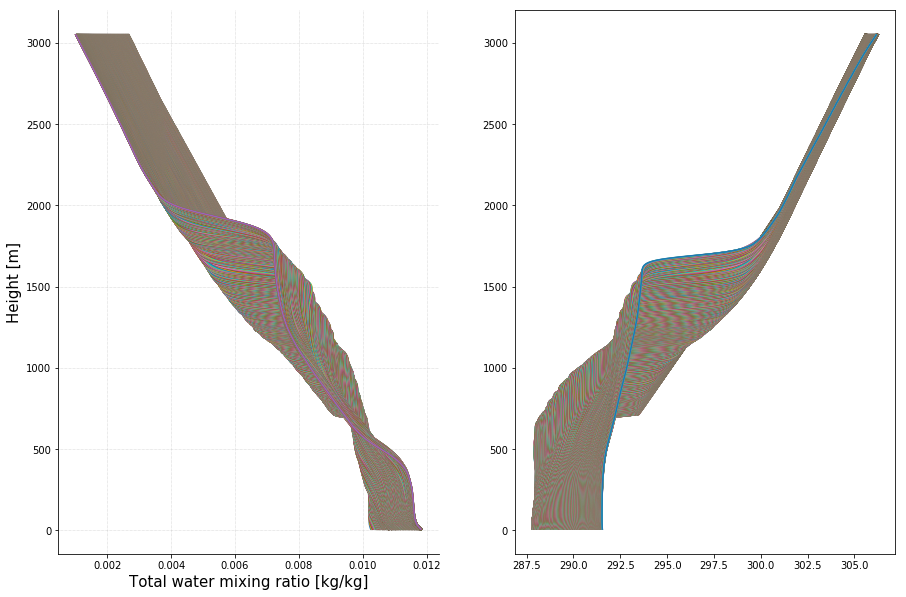

In [22]:
qtl = Dataset('profiles.002.nc').variables['qt'][:]
thll = Dataset('profiles.002.nc').variables['thl'][:]
fig, axs = plt.subplots(2, 2,figsize=(15,10))

ax = plt.subplot(121)
for i in range(np.shape(qtl)[0]):
    plt.plot(qtl[i,:],z)
plt.xlabel('Total water mixing ratio [kg/kg]',fontsize=15)
plt.ylabel('Height [m]',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':',linewidth = 0.5)
ax = plt.subplot(122)
for i in range(np.shape(qtl)[0]):
    plt.plot(thll[i,:],z)
plt.xlabel('Liquid water potential temperature [K]',fontsize=15)
plt.ylabel('Height [m]',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':',linewidth = 0.5)
plt.tight_layout()
plt.savefig('validation.png')

In [ ]:
plt.plot(thv[8*60,:],z)
plt.plot(thv[19*60,:],z)
plt.plot(thv[36*60,:],z)

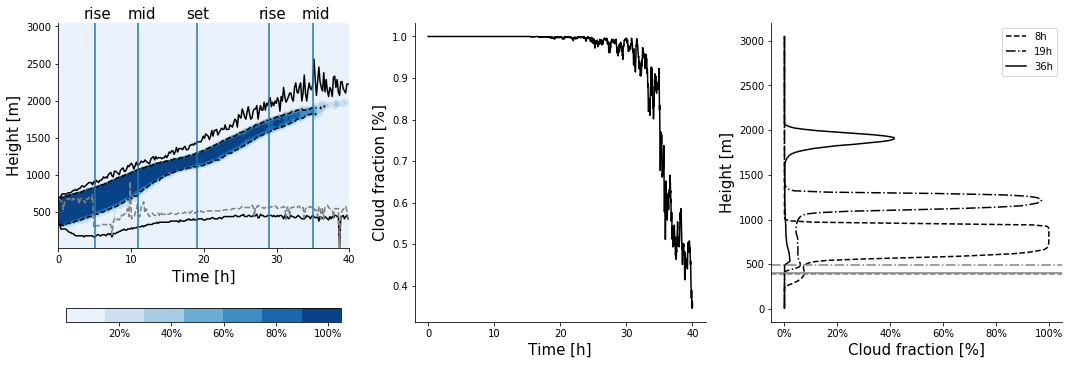

In [55]:
t = np.linspace(0,40,240)

tt,zz = np.meshgrid(z,t)

plt.subplots(1,3,figsize=(15,5))
ax = plt.subplot(131)
cc = plt.contourf(zz,tt,cfrac[:],cmap = 'Blues')
plt.plot(t,hct,'-',color = 'k')
plt.plot(t,hcb,'-',color = 'k')
plt.plot(t,hstt,'--',color = 'k')
plt.plot(t,hstb,'--',color = 'k')
plt.plot(t,hsubcld,'--',color = 'grey')
plt.xticks([0,10,20,30,40], ('0', '10', '20', '30', '40'))
plt.xlabel('Time [h]',fontsize=15)
plt.ylabel('Height [m]',fontsize=15)
plt.axvline(x=5)
plt.text(3.5,3100,'rise',rotation=0,fontsize=15)
plt.axvline(x=11)
plt.text(9.5,3100,'mid',rotation=0,fontsize=15)
plt.axvline(x=19)
plt.text(17.5,3100,'set',rotation=0,fontsize=15)
plt.axvline(x=29)
plt.text(27.5,3100,'rise',rotation=0,fontsize=15)
plt.axvline(x=35)
plt.text(33.5,3100,'mid',rotation=0,fontsize=15)
cbar = plt.colorbar(cc,ticks = [0.2, 0.4, 0.6, 0.8, 1],fraction=0.046, pad=0.2,orientation = 'horizontal' )
cbar.ax.set_xticklabels(['20%','40%','60%','80%','100%'], rotation = -0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(132)
plt.plot(np.linspace(0,40*tt_index/240,2400),tcfrac,'k')
plt.xlabel('Time [h]',fontsize=15)
plt.ylabel('Cloud fraction [%]',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([0,10,20,30,40], ('0', '10', '20', '30', '40'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(133) # 8/19/36
plt.plot(cfrac[48,:],z,'--',color = 'k',label='8h')
plt.axhline(y=hsubcld[48],linestyle='--',color = 'gray')
plt.plot(cfrac[114,:],z,'-.',color = 'k',label='19h')
plt.axhline(y=hsubcld[114],linestyle='-.',color = 'gray')
plt.plot(cfrac[216,:],z,'-',color = 'k',label='36h')
plt.axhline(y=hsubcld[216],linestyle='-',color = 'gray')
plt.legend()
plt.xlabel('Cloud fraction [%]',fontsize=15)
plt.ylabel('Height [m]',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig(fig_dir + 'cloud_evo.eps')

In [51]:
tt_index

240

In [53]:
np.shape(tcfrac)

(2400,)